In [41]:
#!poetry add ipympl
#%matplotlib widget

#%matplotlib nbagg


# Bilder

## Convolution (von Pixeln zum Feature)

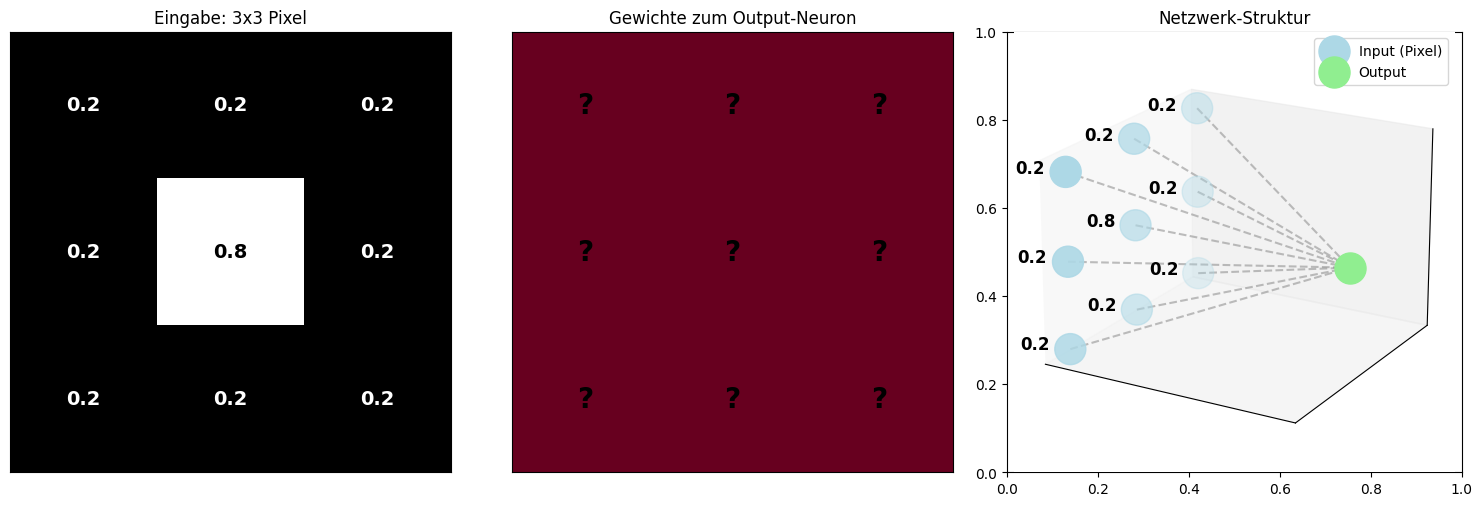

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ein 3x3 Bildausschnitt mit hellerem Mittelpunkt
input_patch = np.array([
   [0.2, 0.2, 0.2],
   [0.2, 0.8, 0.2],
   [0.2, 0.2, 0.2]
])

# Platzhalter für Gewichte
weights = np.zeros((3,3))  # Wird nur für die Farbgebung verwendet

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Eingabepixel mit Werten
axes[0].imshow(input_patch, cmap='gray')
axes[0].set_title('Eingabe: 3x3 Pixel')
for i in range(3):
   for j in range(3):
       axes[0].text(j, i, f'{input_patch[i,j]:.1f}', 
                   ha='center', va='center', 
                   color='white' if input_patch[i,j] < 0.5 else 'black',
                   fontsize=14, fontweight='bold')
axes[0].set_xticks([])
axes[0].set_yticks([])

# Gewichte als Fragezeichen
axes[1].imshow(np.zeros((3,3)), cmap='RdBu')
axes[1].set_title('Gewichte zum Output-Neuron')
for i in range(3):
   for j in range(3):
       axes[1].text(j, i, "?", 
                   ha='center', va='center', 
                   color='black',
                   fontsize=20, fontweight='bold')
axes[1].set_xticks([])
axes[1].set_yticks([])

# 3D Netzwerk-Struktur
ax = axes[2] = plt.subplot(133, projection='3d')
ax.set_title('Netzwerk-Struktur')

# Erstelle 3x3 Grid in 3D - jetzt aufrecht
y, z = np.meshgrid(range(3), range(3))
x = np.zeros_like(y)  # Alle Input-Neuronen in einer Ebene

# Plot input layer als 3x3 Grid
ax.scatter(x.flatten(), y.flatten(), z.flatten(), 
         c='lightblue', s=500, label='Input (Pixel)')

# Plot output neuron rechts vom Grid
output_pos = np.array([2, 1, 1])  # x, y, z
ax.scatter(*output_pos, c='lightgreen', s=500, label='Output')

# Verbindungen - jetzt alle gleich in grau und gestrichelt
for i in range(3):
   for j in range(3):
       ax.plot([x[i,j], output_pos[0]], 
               [y[i,j], output_pos[1]], 
               [z[i,j], output_pos[2]], 
               c='gray', alpha=0.5, linestyle='--')
       # Füge Helligkeitswerte bei den Input-Neuronen hinzu
       ax.text(x[i,j]-0.2, y[i,j], z[i,j], 
               f'{input_patch[i,j]:.1f}', 
               ha='right', va='center',
               fontsize=12, fontweight='bold')

ax.view_init(elev=20, azim=-60)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.legend()

plt.tight_layout()
plt.show()

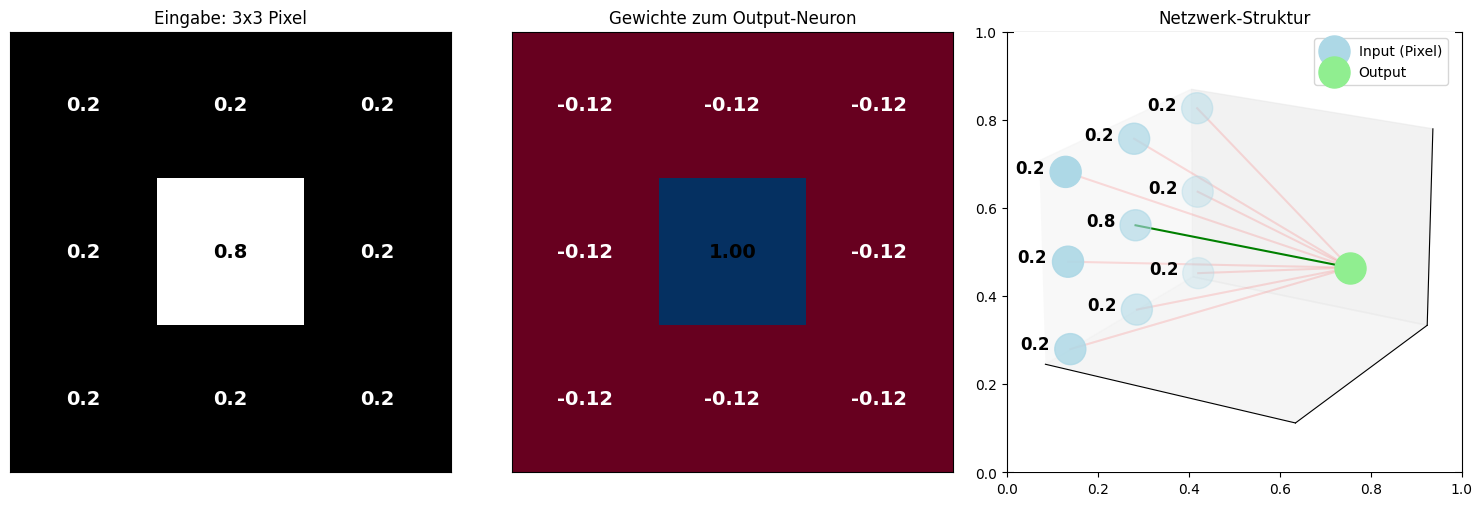

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ein 3x3 Bildausschnitt mit hellerem Mittelpunkt
input_patch = np.array([
    [0.2, 0.2, 0.2],
    [0.2, 0.8, 0.2],
    [0.2, 0.2, 0.2]
])

weights = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
]) / 8

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Eingabepixel mit Werten
axes[0].imshow(input_patch, cmap='gray')
axes[0].set_title('Eingabe: 3x3 Pixel')
for i in range(3):
    for j in range(3):
        axes[0].text(j, i, f'{input_patch[i,j]:.1f}', 
                    ha='center', va='center', color='white' if input_patch[i,j] < 0.5 else 'black',
                    fontsize=14, fontweight='bold')
axes[0].set_xticks([])
axes[0].set_yticks([])

# Gewichte mit Werten
axes[1].imshow(weights, cmap='RdBu')
axes[1].set_title('Gewichte zum Output-Neuron')
for i in range(3):
    for j in range(3):
        axes[1].text(j, i, f'{weights[i,j]:.2f}', 
                    ha='center', va='center', 
                    color='white' if weights[i,j] < 0 else 'black',
                    fontsize=14, fontweight='bold')
axes[1].set_xticks([])
axes[1].set_yticks([])

# 3D Netzwerk-Struktur
ax = axes[2] = plt.subplot(133, projection='3d')
ax.set_title('Netzwerk-Struktur')

# Erstelle 3x3 Grid in 3D - jetzt aufrecht
y, z = np.meshgrid(range(3), range(3))
x = np.zeros_like(y)  # Alle Input-Neuronen in einer Ebene

# Plot input layer als 3x3 Grid
ax.scatter(x.flatten(), y.flatten(), z.flatten(), 
          c='lightblue', s=500, label='Input (Pixel)')

# Plot output neuron rechts vom Grid
output_pos = np.array([2, 1, 1])  # x, y, z
ax.scatter(*output_pos, c='lightgreen', s=500, label='Output')

# Verbindungen mit unterschiedlichen Farben je nach Gewicht
for i in range(3):
    for j in range(3):
        weight = weights[i,j]
        color = 'red' if weight < 0 else 'green'
        ax.plot([x[i,j], output_pos[0]], 
                [y[i,j], output_pos[1]], 
                [z[i,j], output_pos[2]], 
                c=color, alpha=abs(weight))
        # Füge Helligkeitswerte bei den Input-Neuronen hinzu
        ax.text(x[i,j]-0.2, y[i,j], z[i,j], 
                f'{input_patch[i,j]:.1f}', 
                ha='right', va='center',
                fontsize=12, fontweight='bold')

ax.view_init(elev=20, azim=-60)  # Perspektive anpassen
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.legend()

plt.tight_layout()
plt.show()

Output des Neurons: -0.00


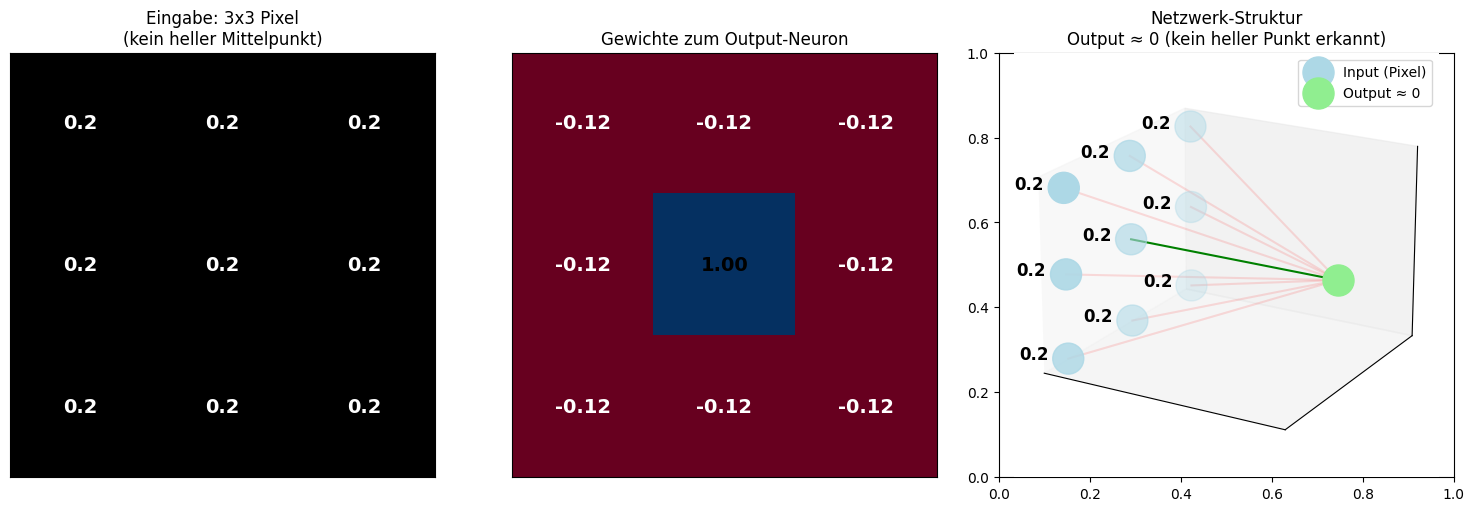

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ein 3x3 Bildausschnitt OHNE helleren Mittelpunkt
input_patch = np.array([
   [0.2, 0.2, 0.2],
   [0.2, 0.2, 0.2],  # Mittelpunkt ist gleich hell
   [0.2, 0.2, 0.2]
])

weights = np.array([
   [-1, -1, -1],
   [-1,  8, -1],
   [-1, -1, -1]
]) / 8

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Eingabepixel mit Werten
axes[0].imshow(input_patch, cmap='gray')
axes[0].set_title('Eingabe: 3x3 Pixel\n(kein heller Mittelpunkt)')
for i in range(3):
   for j in range(3):
       axes[0].text(j, i, f'{input_patch[i,j]:.1f}', 
                   ha='center', va='center', 
                   color='white' if input_patch[i,j] < 0.5 else 'black',
                   fontsize=14, fontweight='bold')
axes[0].set_xticks([])
axes[0].set_yticks([])

# Gewichte mit Werten
axes[1].imshow(weights, cmap='RdBu')
axes[1].set_title('Gewichte zum Output-Neuron')
for i in range(3):
   for j in range(3):
       axes[1].text(j, i, f'{weights[i,j]:.2f}', 
                   ha='center', va='center', 
                   color='white' if weights[i,j] < 0 else 'black',
                   fontsize=14, fontweight='bold')
axes[1].set_xticks([])
axes[1].set_yticks([])

# 3D Netzwerk-Struktur
ax = axes[2] = plt.subplot(133, projection='3d')
ax.set_title('Netzwerk-Struktur\nOutput ≈ 0 (kein heller Punkt erkannt)')

# Erstelle 3x3 Grid in 3D - jetzt aufrecht
y, z = np.meshgrid(range(3), range(3))
x = np.zeros_like(y)  # Alle Input-Neuronen in einer Ebene

# Plot input layer als 3x3 Grid
ax.scatter(x.flatten(), y.flatten(), z.flatten(), 
         c='lightblue', s=500, label='Input (Pixel)')

# Plot output neuron rechts vom Grid
output_pos = np.array([2, 1, 1])  # x, y, z
ax.scatter(*output_pos, c='lightgreen', s=500, label='Output ≈ 0')

# Verbindungen mit unterschiedlichen Farben je nach Gewicht
for i in range(3):
   for j in range(3):
       weight = weights[i,j]
       color = 'red' if weight < 0 else 'green'
       ax.plot([x[i,j], output_pos[0]], 
               [y[i,j], output_pos[1]], 
               [z[i,j], output_pos[2]], 
               c=color, alpha=abs(weight))
       # Füge Helligkeitswerte bei den Input-Neuronen hinzu
       ax.text(x[i,j]-0.2, y[i,j], z[i,j], 
               f'{input_patch[i,j]:.1f}', 
               ha='right', va='center',
               fontsize=12, fontweight='bold')

ax.view_init(elev=20, azim=-60)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.legend()

plt.tight_layout()

# Berechne und zeige Output
output = np.sum(input_patch * weights)
print(f"Output des Neurons: {output:.2f}")  # Sollte nahe 0 sein

plt.show()

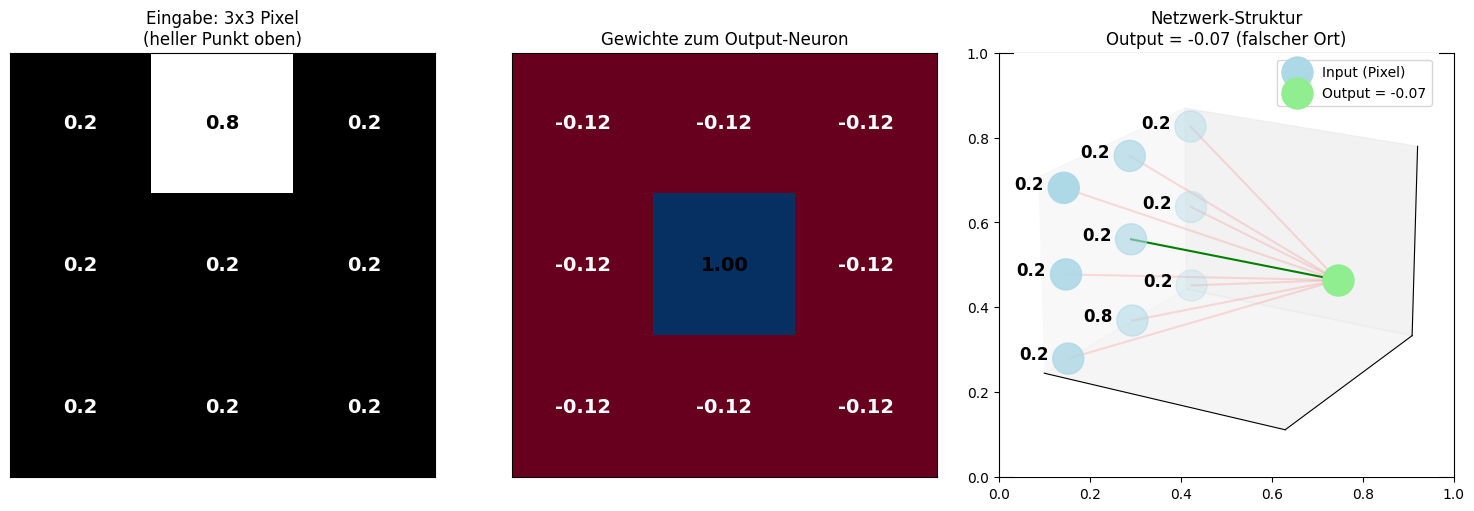

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ein 3x3 Bildausschnitt mit hellerem Pixel NICHT in der Mitte
input_patch = np.array([
   [0.2, 0.8, 0.2],  # Oben Mitte ist hell
   [0.2, 0.2, 0.2],  # Mittelpunkt normal
   [0.2, 0.2, 0.2]
])

weights = np.array([
   [-1, -1, -1],
   [-1,  8, -1],
   [-1, -1, -1]
]) / 8

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Eingabepixel mit Werten
axes[0].imshow(input_patch, cmap='gray')
axes[0].set_title('Eingabe: 3x3 Pixel\n(heller Punkt oben)')
for i in range(3):
   for j in range(3):
       axes[0].text(j, i, f'{input_patch[i,j]:.1f}', 
                   ha='center', va='center', 
                   color='white' if input_patch[i,j] < 0.5 else 'black',
                   fontsize=14, fontweight='bold')
axes[0].set_xticks([])
axes[0].set_yticks([])

# Gewichte mit Werten
axes[1].imshow(weights, cmap='RdBu')
axes[1].set_title('Gewichte zum Output-Neuron')
for i in range(3):
   for j in range(3):
       axes[1].text(j, i, f'{weights[i,j]:.2f}', 
                   ha='center', va='center', 
                   color='white' if weights[i,j] < 0 else 'black',
                   fontsize=14, fontweight='bold')
axes[1].set_xticks([])
axes[1].set_yticks([])

# Berechne Output für Titel
output = np.sum(input_patch * weights)

# 3D Netzwerk-Struktur
ax = axes[2] = plt.subplot(133, projection='3d')
ax.set_title(f'Netzwerk-Struktur\nOutput = {output:.2f} (falscher Ort)')

# Erstelle 3x3 Grid in 3D - jetzt aufrecht
y, z = np.meshgrid(range(3), range(3))
x = np.zeros_like(y)  # Alle Input-Neuronen in einer Ebene

# Plot input layer als 3x3 Grid
ax.scatter(x.flatten(), y.flatten(), z.flatten(), 
         c='lightblue', s=500, label='Input (Pixel)')

# Plot output neuron rechts vom Grid
output_pos = np.array([2, 1, 1])  # x, y, z
ax.scatter(*output_pos, c='lightgreen', s=500, label=f'Output = {output:.2f}')

# Verbindungen mit unterschiedlichen Farben je nach Gewicht
for i in range(3):
   for j in range(3):
       weight = weights[i,j]
       color = 'red' if weight < 0 else 'green'
       ax.plot([x[i,j], output_pos[0]], 
               [y[i,j], output_pos[1]], 
               [z[i,j], output_pos[2]], 
               c=color, alpha=abs(weight))
       # Füge Helligkeitswerte bei den Input-Neuronen hinzu
       ax.text(x[i,j]-0.2, y[i,j], z[i,j], 
               f'{input_patch[i,j]:.1f}', 
               ha='right', va='center',
               fontsize=12, fontweight='bold')

ax.view_init(elev=20, azim=-60)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.legend()

plt.tight_layout()
plt.show()

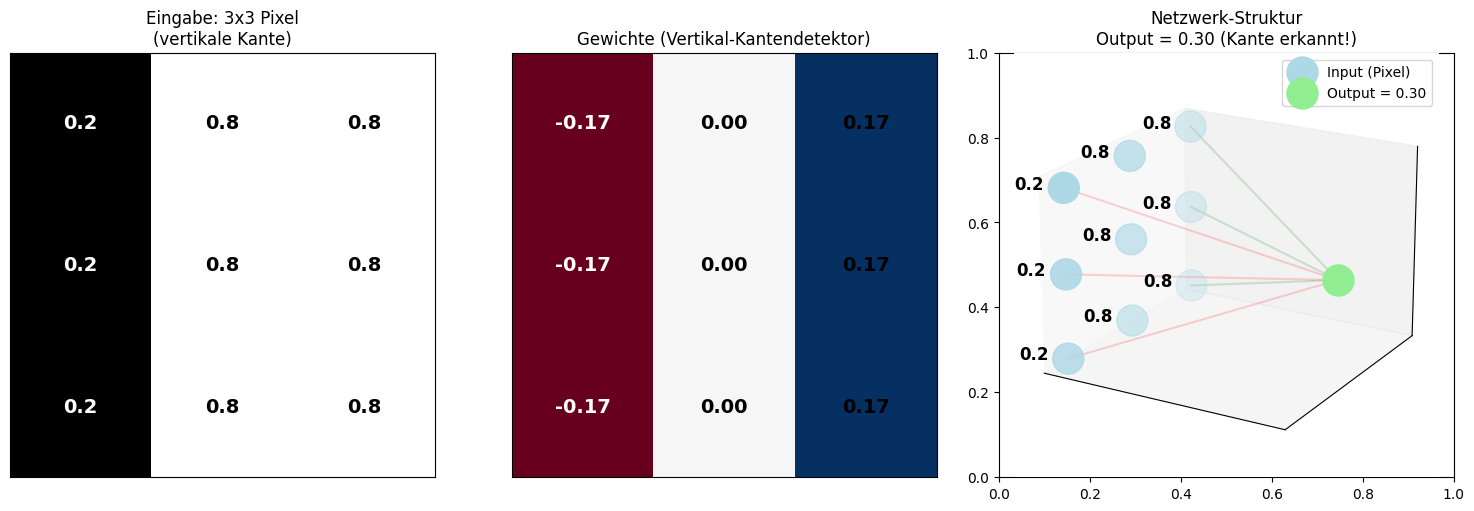

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ein 3x3 Bildausschnitt mit vertikaler Kante
input_patch = np.array([
    [0.2, 0.8, 0.8],  # Links dunkel, rechts hell
    [0.2, 0.8, 0.8],
    [0.2, 0.8, 0.8]
])

weights = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
]) / 6  # Geteilt durch 6 für Normalisierung

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Eingabepixel mit Werten
axes[0].imshow(input_patch, cmap='gray')
axes[0].set_title('Eingabe: 3x3 Pixel\n(vertikale Kante)')
for i in range(3):
    for j in range(3):
        axes[0].text(j, i, f'{input_patch[i,j]:.1f}', 
                    ha='center', va='center', 
                    color='white' if input_patch[i,j] < 0.5 else 'black',
                    fontsize=14, fontweight='bold')
axes[0].set_xticks([])
axes[0].set_yticks([])

# Gewichte mit Werten
axes[1].imshow(weights, cmap='RdBu')
axes[1].set_title('Gewichte (Vertikal-Kantendetektor)')
for i in range(3):
    for j in range(3):
        axes[1].text(j, i, f'{weights[i,j]:.2f}', 
                    ha='center', va='center', 
                    color='white' if weights[i,j] < 0 else 'black',
                    fontsize=14, fontweight='bold')
axes[1].set_xticks([])
axes[1].set_yticks([])

# Berechne Output für Titel
output = np.sum(input_patch * weights)

# 3D Netzwerk-Struktur
ax = axes[2] = plt.subplot(133, projection='3d')
ax.set_title(f'Netzwerk-Struktur\nOutput = {output:.2f} (Kante erkannt!)')

# Erstelle 3x3 Grid in 3D
y, z = np.meshgrid(range(3), range(3))
x = np.zeros_like(y)

# Plot input layer als 3x3 Grid
ax.scatter(x.flatten(), y.flatten(), z.flatten(), 
          c='lightblue', s=500, label='Input (Pixel)')

# Plot output neuron rechts vom Grid
output_pos = np.array([2, 1, 1])
ax.scatter(*output_pos, c='lightgreen', s=500, label=f'Output = {output:.2f}')

# Verbindungen mit unterschiedlichen Farben je nach Gewicht
for i in range(3):
    for j in range(3):
        weight = weights[i,j]
        color = 'red' if weight < 0 else 'green'
        ax.plot([x[i,j], output_pos[0]], 
                [y[i,j], output_pos[1]], 
                [z[i,j], output_pos[2]], 
                c=color, alpha=abs(weight) if weight != 0 else 0)  # Verstecke 0-Gewichte
        # Füge Helligkeitswerte bei den Input-Neuronen hinzu
        ax.text(x[i,j]-0.2, y[i,j], z[i,j], 
                f'{input_patch[i,j]:.1f}', 
                ha='right', va='center',
                fontsize=12, fontweight='bold')

ax.view_init(elev=20, azim=-60)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.legend()

plt.tight_layout()
plt.show()

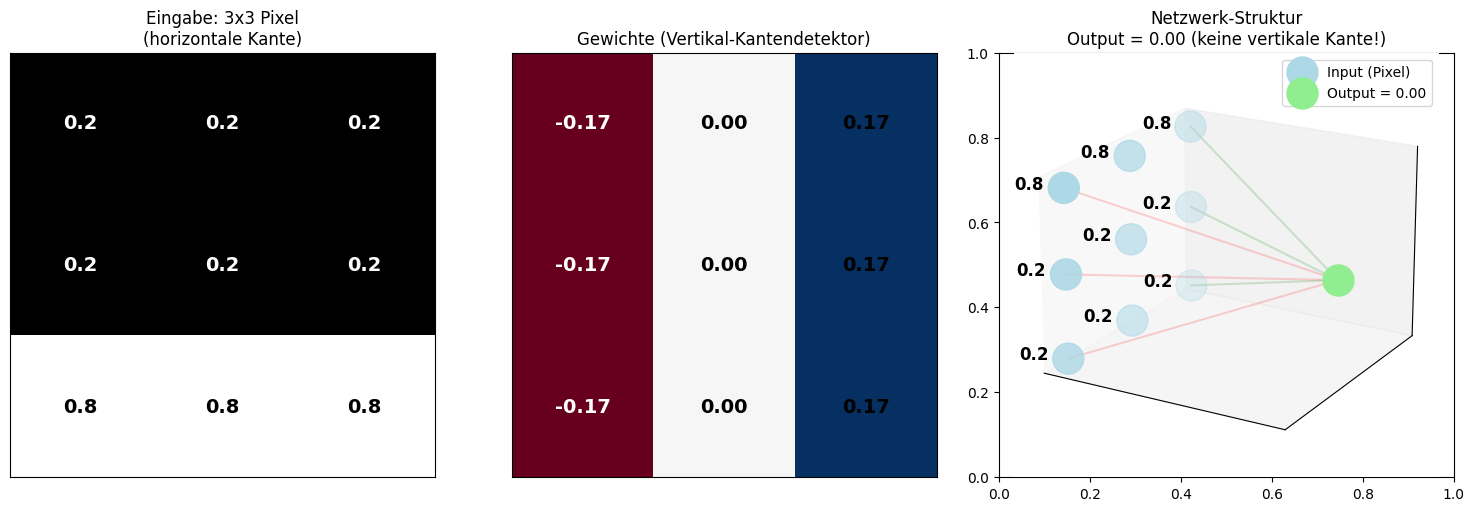

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ein 3x3 Bildausschnitt mit horizontaler Kante (falsche Richtung)
input_patch = np.array([
   [0.2, 0.2, 0.2],  # Oben dunkel
   [0.2, 0.2, 0.2],
   [0.8, 0.8, 0.8]   # Unten hell
])

# Gleicher Kernel wie zuvor (für vertikale Kanten)
weights = np.array([
   [-1, 0, 1],
   [-1, 0, 1],
   [-1, 0, 1]
]) / 6

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Eingabepixel mit Werten
axes[0].imshow(input_patch, cmap='gray')
axes[0].set_title('Eingabe: 3x3 Pixel\n(horizontale Kante)')
for i in range(3):
   for j in range(3):
       axes[0].text(j, i, f'{input_patch[i,j]:.1f}', 
                   ha='center', va='center', 
                   color='white' if input_patch[i,j] < 0.5 else 'black',
                   fontsize=14, fontweight='bold')
axes[0].set_xticks([])
axes[0].set_yticks([])

# Gewichte mit Werten
axes[1].imshow(weights, cmap='RdBu')
axes[1].set_title('Gewichte (Vertikal-Kantendetektor)')
for i in range(3):
   for j in range(3):
       axes[1].text(j, i, f'{weights[i,j]:.2f}', 
                   ha='center', va='center', 
                   color='white' if weights[i,j] < 0 else 'black',
                   fontsize=14, fontweight='bold')
axes[1].set_xticks([])
axes[1].set_yticks([])

# Berechne Output für Titel
output = np.sum(input_patch * weights)

# 3D Netzwerk-Struktur
ax = axes[2] = plt.subplot(133, projection='3d')
ax.set_title(f'Netzwerk-Struktur\nOutput = {output:.2f} (keine vertikale Kante!)')

# Erstelle 3x3 Grid in 3D
y, z = np.meshgrid(range(3), range(3))
x = np.zeros_like(y)

# Plot input layer als 3x3 Grid
ax.scatter(x.flatten(), y.flatten(), z.flatten(), 
         c='lightblue', s=500, label='Input (Pixel)')

# Plot output neuron rechts vom Grid
output_pos = np.array([2, 1, 1])
ax.scatter(*output_pos, c='lightgreen', s=500, label=f'Output = {output:.2f}')

# Verbindungen mit unterschiedlichen Farben je nach Gewicht
for i in range(3):
   for j in range(3):
       weight = weights[i,j]
       color = 'red' if weight < 0 else 'green'
       ax.plot([x[i,j], output_pos[0]], 
               [y[i,j], output_pos[1]], 
               [z[i,j], output_pos[2]], 
               c=color, alpha=abs(weight) if weight != 0 else 0)
       # Füge Helligkeitswerte bei den Input-Neuronen hinzu
       ax.text(x[i,j]-0.2, y[i,j], z[i,j], 
               f'{input_patch[i,j]:.1f}', 
               ha='right', va='center',
               fontsize=12, fontweight='bold')

ax.view_init(elev=20, azim=-60)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.legend()

plt.tight_layout()
plt.show()

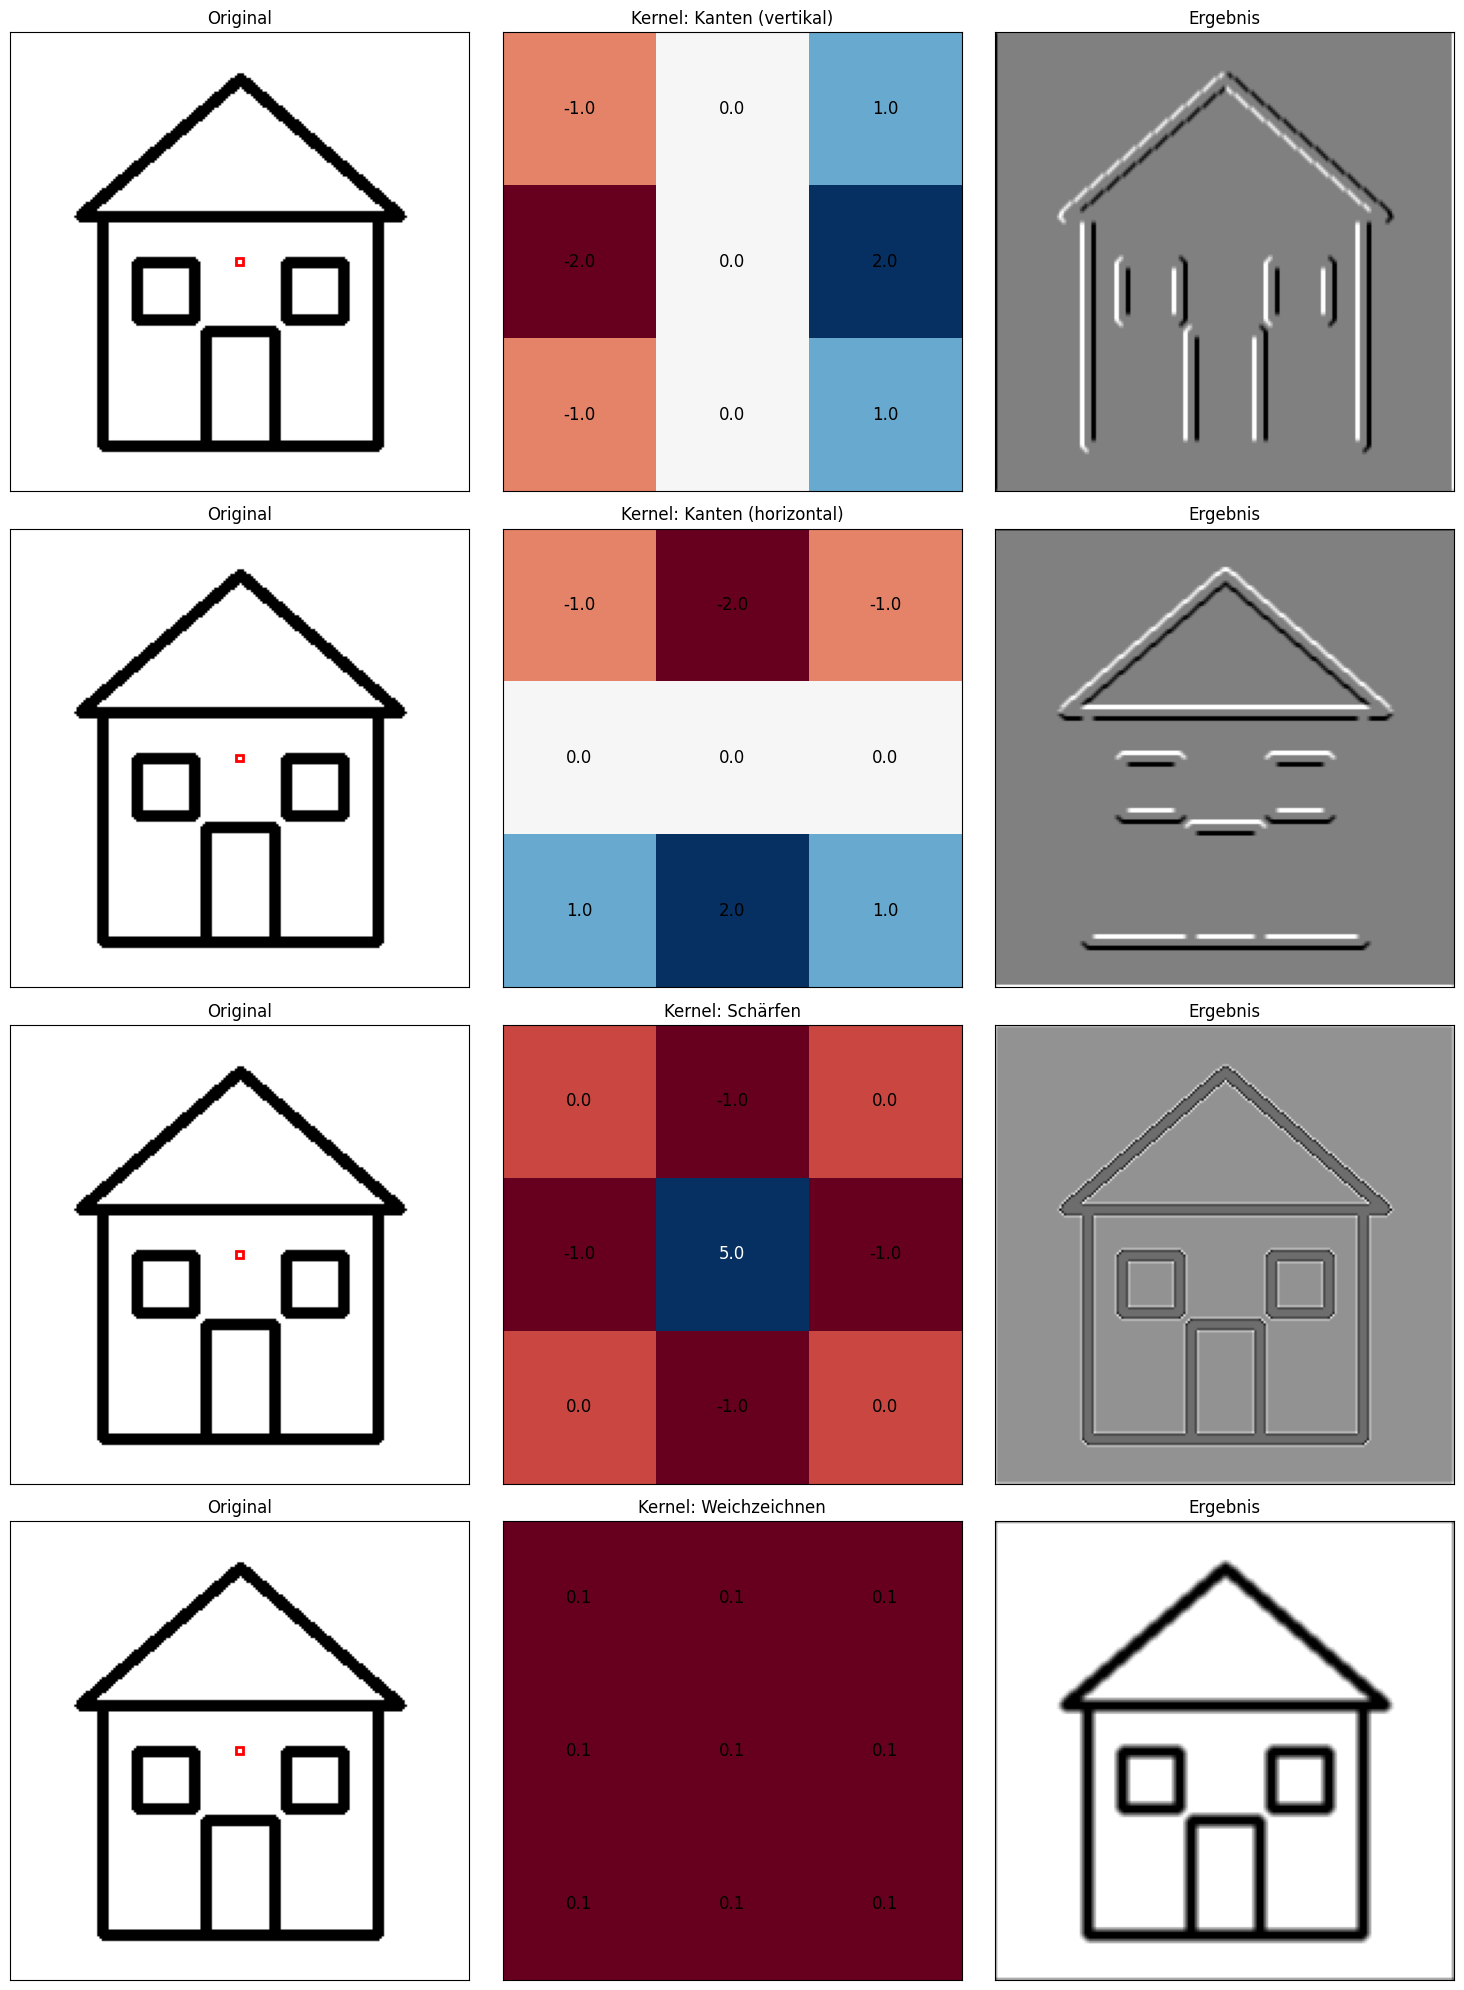

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy import signal
import cv2

def create_simple_house():
    img = np.ones((200, 200), dtype=np.uint8) * 255
    cv2.rectangle(img, (40, 80), (160, 180), 0, 3)
    pts = np.array([[30, 80], [100, 20], [170, 80]], np.int32)
    cv2.polylines(img, [pts], True, 0, 3)
    cv2.rectangle(img, (85, 130), (115, 180), 0, 3)
    cv2.rectangle(img, (55, 100), (80, 125), 0, 3)
    cv2.rectangle(img, (120, 100), (145, 125), 0, 3)
    return img

def create_conv_visualization_static():
    img = create_simple_house()

    kernels = {
        'Kanten (vertikal)': np.array([[-1, 0, 1],
                                      [-2, 0, 2],
                                      [-1, 0, 1]]),
        'Kanten (horizontal)': np.array([[-1, -2, -1],
                                        [0, 0, 0],
                                        [1, 2, 1]]),
        'Schärfen': np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]]),
        'Weichzeichnen': np.array([[1, 1, 1],
                                  [1, 1, 1],
                                  [1, 1, 1]]) / 9
    }

    fig, axes = plt.subplots(4, 3, figsize=(15, 20))
    
    for idx, (name, kernel) in enumerate(kernels.items()):
        # Original mit Kernel-Box
        axes[idx, 0].imshow(img, cmap='gray')
        axes[idx, 0].set_title('Original')
        
        # Zeige Kernel-Position
        kernel_box = Rectangle((98, 98), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
        axes[idx, 0].add_patch(kernel_box)
        
        # Kernel
        kernel_img = axes[idx, 1].imshow(kernel, cmap='RdBu')
        axes[idx, 1].set_title(f'Kernel: {name}')
        
        # Kernel-Werte anzeigen
        for i in range(3):
            for j in range(3):
                axes[idx, 1].text(j, i, f'{kernel[i,j]:.1f}', 
                                ha='center', va='center', 
                                color='white' if abs(kernel[i,j]) > 2 else 'black',
                                fontsize=12)
        
        # Ergebnis
        result = signal.convolve2d(img, kernel, mode='same')
        axes[idx, 2].imshow(result, cmap='gray')
        axes[idx, 2].set_title('Ergebnis')
        
        # Entferne Achsenbeschriftungen
        for ax in axes[idx]:
            ax.set_xticks([])
            ax.set_yticks([])

    plt.tight_layout()
    plt.show()

create_conv_visualization_static()

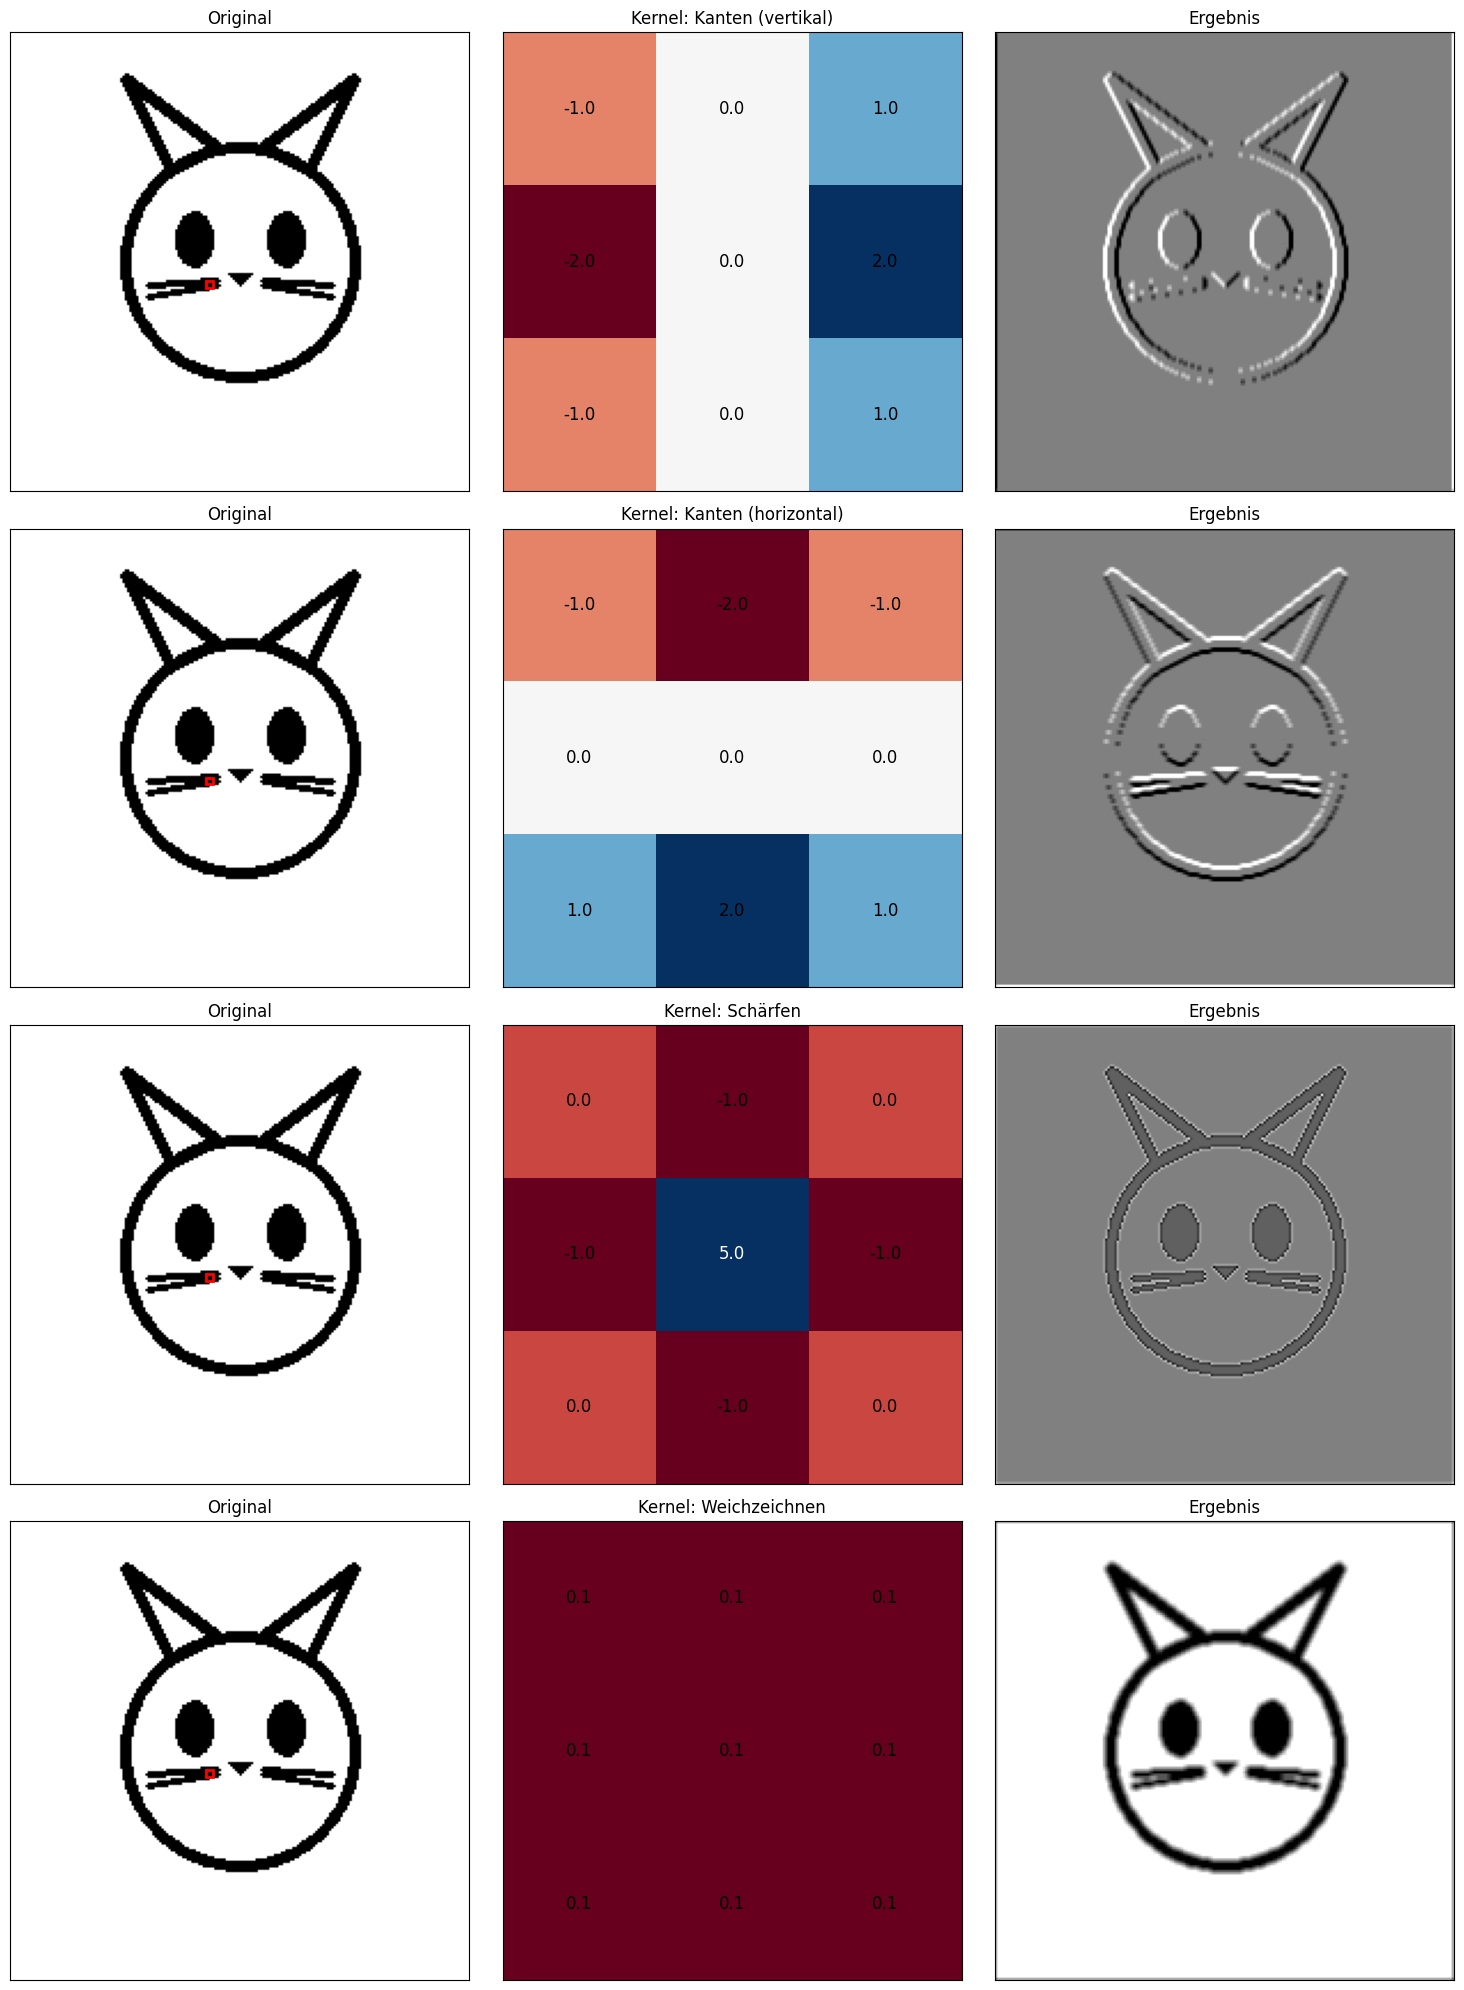

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy import signal
import cv2

def create_simple_cat():
    # Erstelle ein 200x200 weißes Bild
    img = np.ones((200, 200), dtype=np.uint8) * 255
    
    # Zeichne Kopf
    cv2.circle(img, (100, 100), 50, 0, 3)
    
    # Zeichne Ohren
    pts_ear1 = np.array([[70, 60], [50, 20], [90, 50]], np.int32)
    pts_ear2 = np.array([[130, 60], [150, 20], [110, 50]], np.int32)
    cv2.polylines(img, [pts_ear1], True, 0, 3)
    cv2.polylines(img, [pts_ear2], True, 0, 3)
    
    # Zeichne Augen
    cv2.ellipse(img, (80, 90), (8, 12), 0, 0, 360, 0, -1)
    cv2.ellipse(img, (120, 90), (8, 12), 0, 0, 360, 0, -1)
    
    # Zeichne Nase
    pts_nose = np.array([[95, 105], [105, 105], [100, 110]], np.int32)
    cv2.fillPoly(img, [pts_nose], 0)
    
    # Zeichne Schnurrhaare
    cv2.line(img, (60, 110), (90, 108), 0, 2)
    cv2.line(img, (60, 115), (90, 110), 0, 2)
    cv2.line(img, (140, 110), (110, 108), 0, 2)
    cv2.line(img, (140, 115), (110, 110), 0, 2)
    
    return img

def create_conv_visualization_static():
    img = create_simple_cat()  # Verwende Katzenbild statt Haus

    kernels = {
        'Kanten (vertikal)': np.array([[-1, 0, 1],
                                      [-2, 0, 2],
                                      [-1, 0, 1]]),
        'Kanten (horizontal)': np.array([[-1, -2, -1],
                                        [0, 0, 0],
                                        [1, 2, 1]]),
        'Schärfen': np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]]),
        'Weichzeichnen': np.array([[1, 1, 1],
                                  [1, 1, 1],
                                  [1, 1, 1]]) / 9
    }

    fig, axes = plt.subplots(4, 3, figsize=(15, 20))
    
    for idx, (name, kernel) in enumerate(kernels.items()):
        # Original mit Kernel-Box
        axes[idx, 0].imshow(img, cmap='gray')
        axes[idx, 0].set_title('Original')
        
        # Zeige Kernel-Position (bei den Schnurrhaaren)
        kernel_box = Rectangle((85, 108), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
        axes[idx, 0].add_patch(kernel_box)
        
        # Kernel
        kernel_img = axes[idx, 1].imshow(kernel, cmap='RdBu')
        axes[idx, 1].set_title(f'Kernel: {name}')
        
        # Kernel-Werte anzeigen
        for i in range(3):
            for j in range(3):
                axes[idx, 1].text(j, i, f'{kernel[i,j]:.1f}', 
                                ha='center', va='center', 
                                color='white' if abs(kernel[i,j]) > 2 else 'black',
                                fontsize=12)
        
        # Ergebnis
        result = signal.convolve2d(img, kernel, mode='same')
        axes[idx, 2].imshow(result, cmap='gray')
        axes[idx, 2].set_title('Ergebnis')
        
        # Entferne Achsenbeschriftungen
        for ax in axes[idx]:
            ax.set_xticks([])
            ax.set_yticks([])

    plt.tight_layout()
    plt.show()

create_conv_visualization_static()

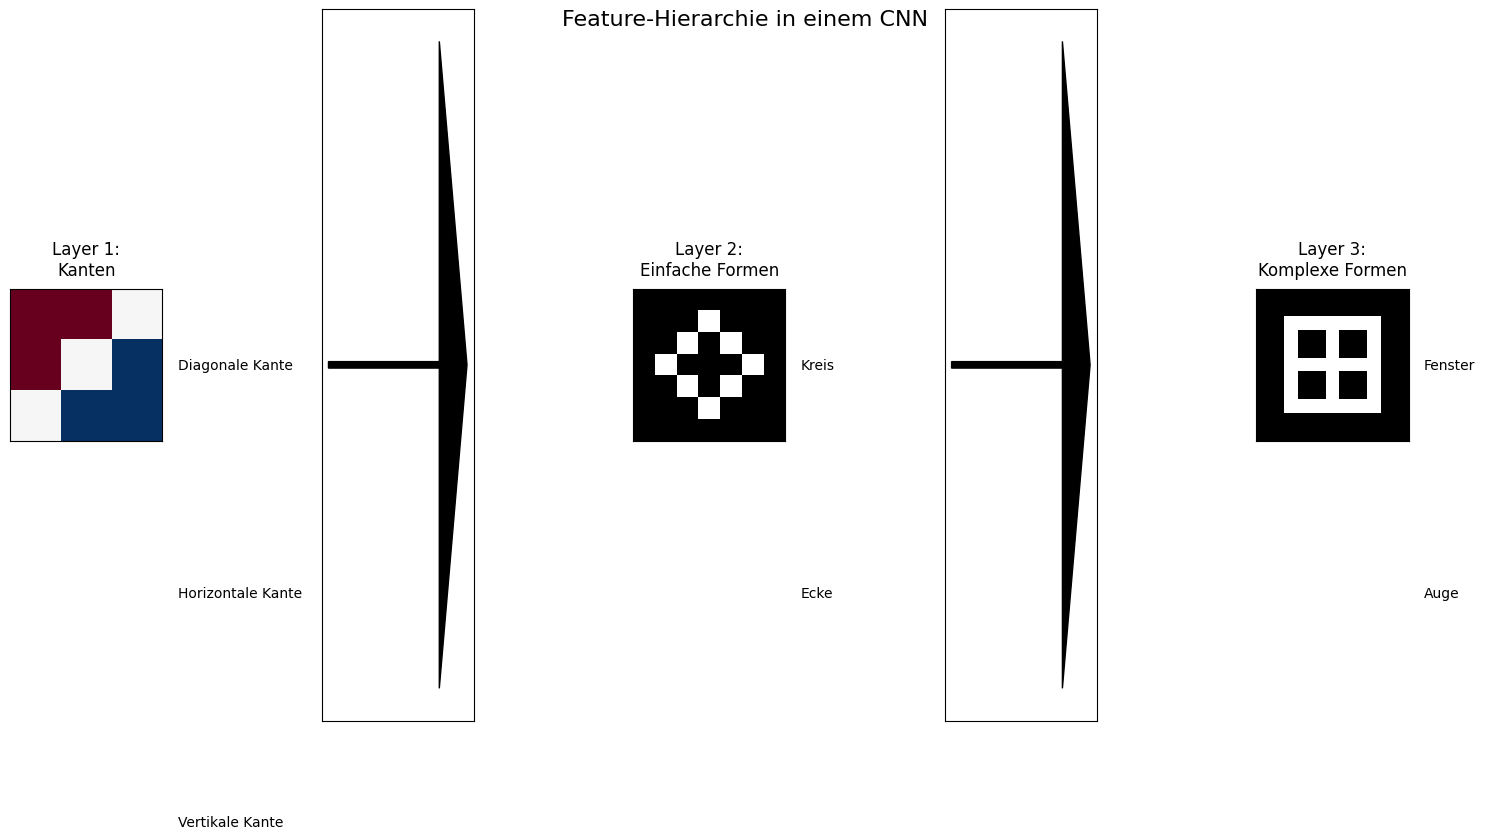

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def create_feature_hierarchy_visualization():
    # Erstelle Beispiel-Features für verschiedene Ebenen
    
    # Layer 1: Einfache Kanten
    layer1_features = {
        'Vertikale Kante': np.array([[-1, 0, 1],
                                    [-1, 0, 1],
                                    [-1, 0, 1]]),
        'Horizontale Kante': np.array([[-1, -1, -1],
                                      [0, 0, 0],
                                      [1, 1, 1]]),
        'Diagonale Kante': np.array([[-1, -1, 0],
                                    [-1, 0, 1],
                                    [0, 1, 1]])
    }
    
    # Layer 2: Einfache Formen (simuliert)
    size = 7
    layer2_features = {}
    
    # Ecke
    corner = np.zeros((size, size))
    cv2.line(corner, (1, size-2), (size-2, size-2), 1, 1)
    cv2.line(corner, (size-2, 1), (size-2, size-2), 1, 1)
    layer2_features['Ecke'] = corner
    
    # Kreis
    circle = np.zeros((size, size))
    cv2.circle(circle, (size//2, size//2), size//3, 1, 1)
    layer2_features['Kreis'] = circle
    
    # Layer 3: Komplexe Formen (simuliert)
    size = 11
    layer3_features = {}
    
    # "Auge"
    eye = np.zeros((size, size))
    cv2.ellipse(eye, (size//2, size//2), (size//3, size//4), 0, 0, 360, 1, 1)
    cv2.circle(eye, (size//2, size//2), size//6, 1, -1)
    layer3_features['Auge'] = eye
    
    # "Fenster"
    window = np.zeros((size, size))
    cv2.rectangle(window, (size//4, size//4), (3*size//4, 3*size//4), 1, 1)
    cv2.line(window, (size//2, size//4), (size//2, 3*size//4), 1, 1)
    cv2.line(window, (size//4, size//2), (3*size//4, size//2), 1, 1)
    layer3_features['Fenster'] = window

    # Plotting
    fig = plt.figure(figsize=(15, 10))
    
    # Titel
    plt.suptitle('Feature-Hierarchie in einem CNN', fontsize=16, y=0.95)
    
    # Layer 1: Kanten
    ax1 = plt.subplot2grid((1, 5), (0, 0))
    ax1.set_title('Layer 1:\nKanten', pad=10)
    y_offset = 0
    for name, feature in layer1_features.items():
        ax1.imshow(feature, cmap='RdBu', extent=[0, 1, y_offset, y_offset+1])
        ax1.text(1.1, y_offset+0.5, name, va='center')
        y_offset += 1.5
    ax1.set_xticks([])
    ax1.set_yticks([])

    # Pfeile
    ax_arrow1 = plt.subplot2grid((1, 5), (0, 1))
    ax_arrow1.arrow(0.1, 0.5, 0.8, 0, head_width=0.1, head_length=0.2, fc='k', ec='k')
    ax_arrow1.set_xticks([])
    ax_arrow1.set_yticks([])
    
    # Layer 2: Einfache Formen
    ax2 = plt.subplot2grid((1, 5), (0, 2))
    ax2.set_title('Layer 2:\nEinfache Formen', pad=10)
    y_offset = 0
    for name, feature in layer2_features.items():
        ax2.imshow(feature, cmap='gray', extent=[0, 1, y_offset, y_offset+1])
        ax2.text(1.1, y_offset+0.5, name, va='center')
        y_offset += 1.5
    ax2.set_xticks([])
    ax2.set_yticks([])

    # Pfeile
    ax_arrow2 = plt.subplot2grid((1, 5), (0, 3))
    ax_arrow2.arrow(0.1, 0.5, 0.8, 0, head_width=0.1, head_length=0.2, fc='k', ec='k')
    ax_arrow2.set_xticks([])
    ax_arrow2.set_yticks([])
    
    # Layer 3: Komplexe Formen
    ax3 = plt.subplot2grid((1, 5), (0, 4))
    ax3.set_title('Layer 3:\nKomplexe Formen', pad=10)
    y_offset = 0
    for name, feature in layer3_features.items():
        ax3.imshow(feature, cmap='gray', extent=[0, 1, y_offset, y_offset+1])
        ax3.text(1.1, y_offset+0.5, name, va='center')
        y_offset += 1.5
    ax3.set_xticks([])
    ax3.set_yticks([])

    plt.tight_layout()
    plt.show()

create_feature_hierarchy_visualization()

## Pooling (Herauszoomen)

## Strides and Padding

## Resnet

## YOLO

## Segmentierung UNET

## Transfer Learning

# Wie Netze Sequenzen verarbeiten (RNNs)

### RNN

In [2]:
import plotly.graph_objects as go
import numpy as np

# Konstanten
NODE_SIZE = dict(
    input=40,
    hidden=60,
    output=40
)

COLORS = dict(
    input='rgba(173, 216, 230, 0.7)',      # hellblau
    hidden='rgba(144, 238, 144, 0.7)',     # hellgrün
    output='rgba(250, 128, 114, 0.7)',     # lachs
    recurrent='rgba(218, 112, 214, 0.7)',  # orchidee
    lines='rgba(128, 128, 128, 0.4)'       # grau
)

# Positionen für die Zeitschritte
TIMESTEPS = 3
X_SPACING = 3
Y_SPACING = 2

# Figure erstellen
fig = go.Figure()

# Funktion zum Hinzufügen von Nodes
def add_node(x, y, node_type, text, show_legend=True):
    return fig.add_trace(go.Scatter(
        x=[x],
        y=[y],
        mode='markers+text',
        marker=dict(
            size=NODE_SIZE[node_type],
            color=COLORS[node_type],
            line=dict(color='rgba(70, 70, 70, 0.8)', width=1)
        ),
        text=text,
        textposition='middle center',
        name=node_type.capitalize() if show_legend else None,
        showlegend=show_legend
    ))

# Funktion zum Hinzufügen von Verbindungen
def add_connection(x1, y1, x2, y2, color=COLORS['lines'], width=2):
    fig.add_trace(go.Scatter(
        x=[x1, x2],
        y=[y1, y2],
        mode='lines',
        line=dict(color=color, width=width),
        showlegend=False
    ))

# Nodes für jeden Zeitschritt hinzufügen
for t in range(TIMESTEPS):
    # Input node
    add_node(
        x=t * X_SPACING,
        y=0,
        node_type='input',
        text=f'x{t}',
        show_legend=(t == 0)
    )
    
    # Hidden state node
    add_node(
        x=t * X_SPACING,
        y=Y_SPACING,
        node_type='hidden',
        text=f'h{t}',
        show_legend=(t == 0)
    )
    
    # Output node
    add_node(
        x=t * X_SPACING,
        y=Y_SPACING * 2,
        node_type='output',
        text=f'y{t}',
        show_legend=(t == 0)
    )
    
    # Verbindungen innerhalb eines Zeitschritts
    # Input zu Hidden
    add_connection(
        t * X_SPACING,
        0,
        t * X_SPACING,
        Y_SPACING
    )
    
    # Hidden zu Output
    add_connection(
        t * X_SPACING,
        Y_SPACING,
        t * X_SPACING,
        Y_SPACING * 2
    )
    
    # Rekurrente Verbindung zum nächsten Zeitschritt
    if t < TIMESTEPS - 1:
        add_connection(
            t * X_SPACING,
            Y_SPACING,
            (t + 1) * X_SPACING,
            Y_SPACING,
            color=COLORS['recurrent'],
            width=3
        )

# Formelbox hinzufügen
formula = """
h_t = tanh(W_h · h_{t-1} + W_x · x_t + b_h)
y_t = W_y · h_t + b_y
"""

fig.add_annotation(
    x=TIMESTEPS * X_SPACING / 2,
    y=Y_SPACING * 2.5,
    text=formula,
    showarrow=False,
    font=dict(size=14, family='Computer Modern'),
    bgcolor='rgba(255, 255, 255, 0.9)',
    bordercolor='rgba(0, 0, 0, 0.3)',
    borderwidth=1,
    borderpad=10
)

# Layout
fig.update_layout(
    title=dict(
        text='Rekurrentes Neuronales Netz (RNN) über drei Zeitschritte',
        x=0.5,
        y=0.95,
        font=dict(size=16)
    ),
    showlegend=True,
    xaxis=dict(
        showticklabels=False,
        range=[-1, TIMESTEPS * X_SPACING + 1]
    ),
    yaxis=dict(
        showticklabels=False,
        range=[-1, Y_SPACING * 2.5 + 1]
    ),
    plot_bgcolor='white',
    width=1000,
    height=600,
    margin=dict(t=100, b=50)
)

fig.show()

In [6]:
# Erste Stunde (Mathe, 8 Uhr)
x_0 = [1, 8]        # 1. Stunde, Mathe (Schwierigkeit 8)
h_0 = [0.9]         # Schüler startet ausgeruht
y_0 = 0.9          # Hohe Konzentration

# Zweite Stunde (Sport, 9 Uhr)
x_1 = [2, 3]        # 2. Stunde, Sport (Schwierigkeit 3)
h_1 = [0.7]         # Etwas erschöpft von Mathe
y_1 = 0.85        # Noch gute Konzentration

# Dritte Stunde (Physik, 10 Uhr)
x_2 = [3, 7]        # 3. Stunde, Physik (Schwierigkeit 7)
h_2 = [0.4]         # Deutlich erschöpfter
y_2 = 0.6          # Konzentration lässt nach

In [7]:
import plotly.graph_objects as go
import numpy as np

# Konstanten
NODE_SIZE = dict(
    input=50,
    hidden=70,
    output=50
)

COLORS = dict(
    input='rgba(173, 216, 230, 0.7)',      # hellblau
    hidden='rgba(144, 238, 144, 0.7)',     # hellgrün
    output='rgba(250, 128, 114, 0.7)',     # lachs
    recurrent='rgba(218, 112, 214, 0.7)',  # orchidee
    lines='rgba(128, 128, 128, 0.4)',      # grau
    weights='rgba(255, 165, 0, 0.7)'       # orange für Gewichte
)

# Positionen für die Zeitschritte
TIMESTEPS = 3
X_SPACING = 4  # Erhöht für mehr Platz
Y_SPACING = 2.5  # Erhöht für mehr Platz

# Figure erstellen
fig = go.Figure()

# Funktion zum Hinzufügen von Nodes mit Werten
def add_node(x, y, node_type, main_text, value_text="", show_legend=True):
    text = f"{main_text}<br>{value_text}" if value_text else main_text
    return fig.add_trace(go.Scatter(
        x=[x],
        y=[y],
        mode='markers+text',
        marker=dict(
            size=NODE_SIZE[node_type],
            color=COLORS[node_type],
            line=dict(color='rgba(70, 70, 70, 0.8)', width=1)
        ),
        text=text,
        textposition='middle center',
        name=node_type.capitalize() if show_legend else None,
        showlegend=show_legend
    ))

# Funktion zum Hinzufügen von Verbindungen mit Gewichtstext
def add_connection(x1, y1, x2, y2, weight_text=None, color=COLORS['lines'], width=2):
    fig.add_trace(go.Scatter(
        x=[x1, x2],
        y=[y1, y2],
        mode='lines',
        line=dict(color=color, width=width),
        showlegend=False
    ))
    
    if weight_text:
        x_mid = (x1 + x2) / 2
        y_mid = (y1 + y2) / 2
        
        fig.add_trace(go.Scatter(
            x=[x_mid],
            y=[y_mid],
            mode='markers+text',
            marker=dict(
                size=30,
                color=COLORS['weights']
            ),
            text=weight_text,
            textposition='middle center',
            showlegend=False
        ))

# Input Werte für jede Stunde
inputs = [
    "1. Stunde (Mathe)\n[1, 8]",
    "2. Stunde (Sport)\n[2, 3]",
    "3. Stunde (Physik)\n[3, 7]"
]

# Hidden States (Energielevel)
hidden_states = [
    "Energielevel\n0.9",
    "Energielevel\n0.7",
    "Energielevel\n0.4"
]

# Outputs (Konzentration)
outputs = [
    "Konzentration\n90%",
    "Konzentration\n85%",
    "Konzentration\n60%"
]

# Nodes für jeden Zeitschritt hinzufügen
for t in range(TIMESTEPS):
    # Input node
    add_node(
        x=t * X_SPACING,
        y=0,
        node_type='input',
        main_text=inputs[t],
        show_legend=(t == 0)
    )
    
    # Hidden state node
    add_node(
        x=t * X_SPACING,
        y=Y_SPACING,
        node_type='hidden',
        main_text=hidden_states[t],
        show_legend=(t == 0)
    )
    
    # Output node
    add_node(
        x=t * X_SPACING,
        y=Y_SPACING * 2,
        node_type='output',
        main_text=outputs[t],
        show_legend=(t == 0)
    )
    
    # Verbindungen innerhalb eines Zeitschritts
    add_connection(
        t * X_SPACING,
        0,
        t * X_SPACING,
        Y_SPACING,
        weight_text='W_x'
    )
    
    add_connection(
        t * X_SPACING,
        Y_SPACING,
        t * X_SPACING,
        Y_SPACING * 2,
        weight_text='W_y'
    )
    
    if t < TIMESTEPS - 1:
        add_connection(
            t * X_SPACING,
            Y_SPACING,
            (t + 1) * X_SPACING,
            Y_SPACING,
            weight_text='W_h',
            color=COLORS['recurrent'],
            width=3
        )

# Erklärungsbox
fig.add_annotation(
    x=-1,
    y=-1,
    text='Inputs pro Stunde: [Stunde, Schwierigkeit]<br>' + 
         'Hidden State: Energielevel (0-1)<br>' +
         'Output: Konzentration (0-100%)<br>' +
         'W_x: Einfluss der aktuellen Stunde<br>' +
         'W_h: Übertragung der Müdigkeit<br>' +
         'W_y: Umrechnung in Konzentration',
    showarrow=False,
    font=dict(size=12),
    align='left',
    bgcolor='rgba(255, 255, 255, 0.9)',
    bordercolor='rgba(0, 0, 0, 0.3)',
    borderwidth=1,
    borderpad=10
)

# Layout
fig.update_layout(
    title=dict(
        text='RNN für Schülerkonzentration über den Schultag',
        x=0.5,
        y=0.95,
        font=dict(size=16)
    ),
    showlegend=True,
    xaxis=dict(
        showticklabels=False,
        range=[-1.5, TIMESTEPS * X_SPACING + 1]
    ),
    yaxis=dict(
        showticklabels=False,
        range=[-1.5, Y_SPACING * 2.5 + 1]
    ),
    plot_bgcolor='white',
    width=1200,  # Breiter für bessere Lesbarkeit
    height=700,  # Höher für bessere Lesbarkeit
    margin=dict(t=100, b=50)
)

fig.show()

In [3]:
import plotly.graph_objects as go
import numpy as np

# Konstanten
NODE_SIZE = dict(
    input=40,
    hidden=60,
    output=40
)

COLORS = dict(
    input='rgba(173, 216, 230, 0.7)',      # hellblau
    hidden='rgba(144, 238, 144, 0.7)',     # hellgrün
    output='rgba(250, 128, 114, 0.7)',     # lachs
    recurrent='rgba(218, 112, 214, 0.7)',  # orchidee
    lines='rgba(128, 128, 128, 0.4)',      # grau
    weights='rgba(255, 165, 0, 0.7)'       # orange für Gewichte
)

# Positionen für die Zeitschritte
TIMESTEPS = 3
X_SPACING = 3
Y_SPACING = 2

# Figure erstellen
fig = go.Figure()

# Funktion zum Hinzufügen von Nodes
def add_node(x, y, node_type, text, show_legend=True):
    return fig.add_trace(go.Scatter(
        x=[x],
        y=[y],
        mode='markers+text',
        marker=dict(
            size=NODE_SIZE[node_type],
            color=COLORS[node_type],
            line=dict(color='rgba(70, 70, 70, 0.8)', width=1)
        ),
        text=text,
        textposition='middle center',
        name=node_type.capitalize() if show_legend else None,
        showlegend=show_legend
    ))

# Funktion zum Hinzufügen von Verbindungen mit Gewichtstext
def add_connection(x1, y1, x2, y2, weight_text=None, color=COLORS['lines'], width=2):
    # Verbindungslinie
    fig.add_trace(go.Scatter(
        x=[x1, x2],
        y=[y1, y2],
        mode='lines',
        line=dict(color=color, width=width),
        showlegend=False
    ))
    
    # Gewichtstext, wenn angegeben
    if weight_text:
        # Berechne Mittelpunkt
        x_mid = (x1 + x2) / 2
        y_mid = (y1 + y2) / 2
        
        # Füge Gewichtstext hinzu
        fig.add_trace(go.Scatter(
            x=[x_mid],
            y=[y_mid],
            mode='markers+text',
            marker=dict(
                size=30,
                color=COLORS['weights']
            ),
            text=weight_text,
            textposition='middle center',
            showlegend=False
        ))

# Nodes für jeden Zeitschritt hinzufügen
for t in range(TIMESTEPS):
    # Input node
    add_node(
        x=t * X_SPACING,
        y=0,
        node_type='input',
        text=f'x{t}',
        show_legend=(t == 0)
    )
    
    # Hidden state node
    add_node(
        x=t * X_SPACING,
        y=Y_SPACING,
        node_type='hidden',
        text=f'h{t}',
        show_legend=(t == 0)
    )
    
    # Output node
    add_node(
        x=t * X_SPACING,
        y=Y_SPACING * 2,
        node_type='output',
        text=f'y{t}',
        show_legend=(t == 0)
    )
    
    # Verbindungen innerhalb eines Zeitschritts
    # Input zu Hidden (immer mit W_x)
    add_connection(
        t * X_SPACING,
        0,
        t * X_SPACING,
        Y_SPACING,
        weight_text='W_x'
    )
    
    # Hidden zu Output (immer mit W_y)
    add_connection(
        t * X_SPACING,
        Y_SPACING,
        t * X_SPACING,
        Y_SPACING * 2,
        weight_text='W_y'
    )
    
    # Rekurrente Verbindung zum nächsten Zeitschritt (immer mit W_h)
    if t < TIMESTEPS - 1:
        add_connection(
            t * X_SPACING,
            Y_SPACING,
            (t + 1) * X_SPACING,
            Y_SPACING,
            weight_text='W_h',
            color=COLORS['recurrent'],
            width=3
        )

# Legende für die Gewichte
fig.add_annotation(
    x=-1,
    y=-1,
    text='Gewichte:<br>W_x: Input → Hidden<br>W_h: Hidden → Hidden (rekurrent)<br>W_y: Hidden → Output<br>Alle Gewichte werden über Zeitschritte wiederverwendet!',
    showarrow=False,
    font=dict(size=12),
    align='left',
    bgcolor='rgba(255, 255, 255, 0.9)',
    bordercolor='rgba(0, 0, 0, 0.3)',
    borderwidth=1,
    borderpad=10
)

# Formelbox
formula = """
h_t = tanh(W_h · h_{t-1} + W_x · x_t + b_h)
y_t = W_y · h_t + b_y
Gleiche W_x, W_h, W_y für alle Zeitschritte!
"""

fig.add_annotation(
    x=TIMESTEPS * X_SPACING / 2,
    y=Y_SPACING * 2.5,
    text=formula,
    showarrow=False,
    font=dict(size=14, family='Computer Modern'),
    bgcolor='rgba(255, 255, 255, 0.9)',
    bordercolor='rgba(0, 0, 0, 0.3)',
    borderwidth=1,
    borderpad=10
)

# Layout
fig.update_layout(
    title=dict(
        text='Rekurrentes Neuronales Netz (RNN) mit wiederverwendeten Gewichten',
        x=0.5,
        y=0.95,
        font=dict(size=16)
    ),
    showlegend=True,
    xaxis=dict(
        showticklabels=False,
        range=[-1.5, TIMESTEPS * X_SPACING + 1]
    ),
    yaxis=dict(
        showticklabels=False,
        range=[-1.5, Y_SPACING * 2.5 + 1]
    ),
    plot_bgcolor='white',
    width=1000,
    height=600,
    margin=dict(t=100, b=50)
)

fig.show()

### GRU

### LSTM